# Text files and CSV

## Pandas
* Data in tabular form? Use [Pandas](https://pandas.pydata.org/) package
* It can easily read and write text/ascii/csv files
* Data is messy? Read the messy data and clean in Pandas
* Pandas can deal with column renaming, missing values, column datatypes, date and time settings and timezones 
* Want to plot all numerical columns in the same axis? Pandas plotting method got you covered
* Pandas documentation [page](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) has a 10 min guide to get you started

### Exercise
We will use Pandas to do the following tasks
* Read rainfall data (accessible from data/ directory) for 36 subdivisions in India
* plot summer monsoon rainfall for all divisions for a given year
* tidy the data and index it by date
* plot time series for selected subdivisions

Data used here is provided by India Meteorological Department(IMD), Govt. of India
and downloaded from [here](https://www.kaggle.com/rajanand/rainfall-in-india) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read the data
df = pd.read_csv('data/rainfall_in_india_1901-2015.csv',na_values='nan')

In [3]:
# display first 5 rows
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [4]:
# display last 5 rows
df.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4115,LAKSHADWEEP,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4


In [5]:
# prints info of row and column types
# and the number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [6]:
# get the number of null values
df.loc[:,'YEAR':'DEC'].isnull().sum()

YEAR     0
JAN      4
FEB      3
MAR      6
APR      4
MAY      3
JUN      5
JUL      7
AUG      4
SEP      6
OCT      7
NOV     11
DEC     10
dtype: int64

In [7]:
# unique values in a column
df['SUBDIVISION'].unique()

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [8]:
# index by year
df_year = df.set_index('YEAR')
df_year.head(10)

,SUBDIVISION,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
YEAR,,,,,,,,,,,,,,,,,,
1901,ANDAMAN & NICOBAR ISLANDS,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1902,ANDAMAN & NICOBAR ISLANDS,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
1903,ANDAMAN & NICOBAR ISLANDS,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
1904,ANDAMAN & NICOBAR ISLANDS,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
1905,ANDAMAN & NICOBAR ISLANDS,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
1906,ANDAMAN & NICOBAR ISLANDS,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
1907,ANDAMAN & NICOBAR ISLANDS,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
1908,ANDAMAN & NICOBAR ISLANDS,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
1910,ANDAMAN & NICOBAR ISLANDS,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0


<AxesSubplot:xlabel='SUBDIVISION'>

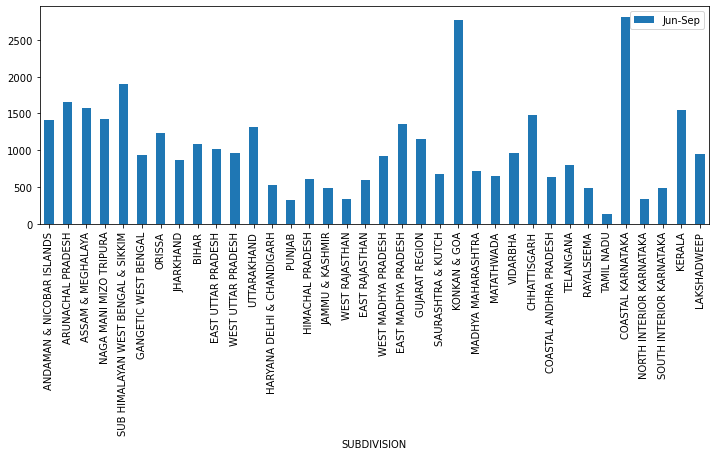

In [9]:
# cell magic command to get plots inline
%matplotlib inline 
# select a year and plot rainfall through jun-sep for all subdivision
df_year.loc[2003,['SUBDIVISION','Jun-Sep']].plot(x='SUBDIVISION',kind='bar',figsize=(12,4))

In [10]:
# function to convert datetime from strings to python recognized type for datetime
def tidy(df):
    df = df.copy()
    df['date'] = pd.to_datetime(df['year'].astype(str)+df['month'].astype(str),format='%Y%b')
    return df.set_index('date')

In [11]:
# reorient the data so that dates become the index and 
# drop the columns to the right of "ANNUAL" column
df_clean= (df.loc[:,'SUBDIVISION':'DEC']
           .dropna(how='any')
          .set_index(['SUBDIVISION','YEAR'])
          .stack()
          .reset_index()
          .rename(columns={'YEAR':'year','level_2':'month',0:'precip','SUBDIVISION':'subdivision'})
          .reindex(columns=['subdivision','year','month','precip'])
          .pipe(tidy) # calls function tidy with preceeding dataframe as argument
          .drop(columns=['year','month'])
         )
df_clean.tail()

,subdivision,precip
date,,
2015-08-01,LAKSHADWEEP,146.4
2015-09-01,LAKSHADWEEP,160.4
2015-10-01,LAKSHADWEEP,165.4
2015-11-01,LAKSHADWEEP,231.0
2015-12-01,LAKSHADWEEP,159.0


Text(0.5, 0.98, 'Monthly rainfall in Kerala')

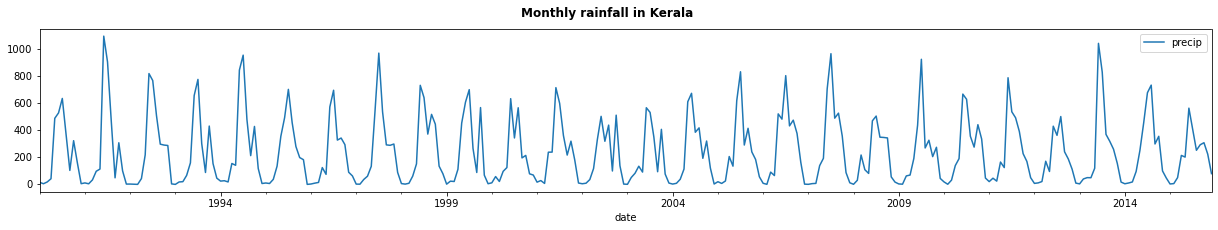

In [12]:
# select data for Kerala and plot
df_krl = df_clean.loc[df_clean['subdivision']=='KERALA',['precip']]
df_krl.loc['1990':'2015'].plot(figsize=(21,3))
plt.suptitle("Monthly rainfall in Kerala",fontweight='bold')

In [13]:
# select rainfall for Telangana state and join it to the dataframe for Kerala
df_tel = df_clean.loc[df_clean['subdivision']=='TELANGANA',['precip']]
df_join = df_tel.join(df_krl,lsuffix='_telangana',rsuffix='_kerala')
df_join.head()

,precip_telangana,precip_kerala
date,,
1901-01-01,6.9,28.7
1901-02-01,41.8,44.7
1901-03-01,7.8,51.6
1901-04-01,45.2,160.0
1901-05-01,22.0,174.7


Text(0.5, 0.98, 'Rainfall distribution')

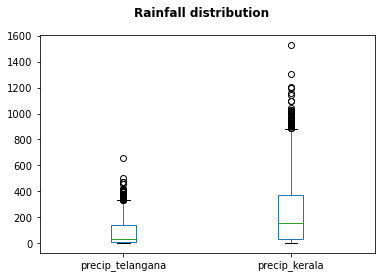

In [14]:
df_join.plot(kind='box')
plt.suptitle("Rainfall distribution",fontweight='bold')

subdivision
ARUNACHAL PRADESH       AxesSubplot(0.125,0.2;0.775x0.68)
ASSAM & MEGHALAYA    AxesSubplot(0.125,0.125;0.775x0.755)
KERALA               AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

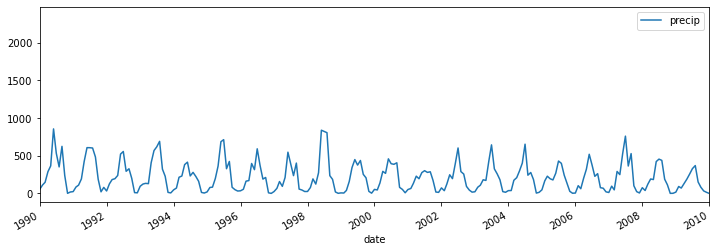

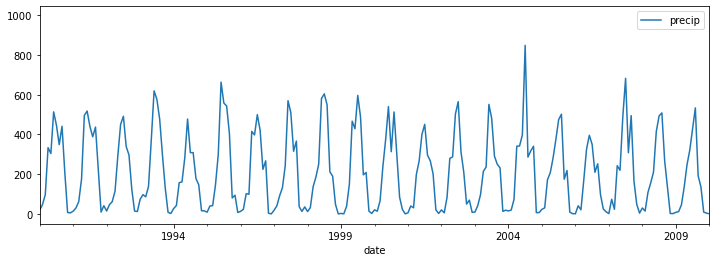

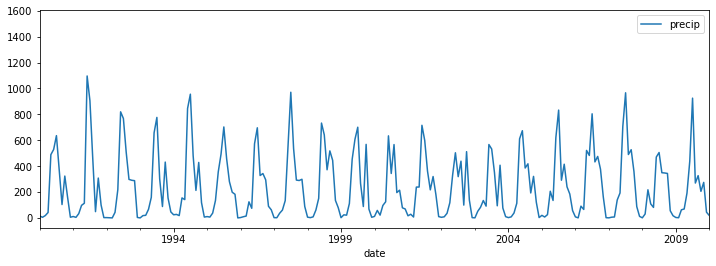

In [15]:
# groupby subdivisions and plot rainall time series for three selected subdivisions
selected_subd = ['KERALA','ARUNACHAL PRADESH','ASSAM & MEGHALAYA']
(df_clean.loc[df_clean['subdivision'].isin(selected_subd)]
         .groupby('subdivision').plot(figsize=(12,4),xlim=('1990','2010')))

## Further references:
* Definitely checout Pandas documentation [page](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html).
* A course of basic Pandas can be found in the [realpython](https://realpython.com/courses/pandas-dataframes-101/) website.
* Also checkout [tomaugspurger](https://tomaugspurger.github.io/modern-1-intro.html) blog on Modern Pandas